In [29]:
import tensorflow as tf
from tensorflow.keras import models, layers, initializers, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [30]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28*28).astype('float32')/255.0
x_test = x_test.reshape(-1, 28*28).astype('float32')/255.0

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [31]:
def create_model(initializer, dropout_rate = 0.3, regularizer = regularizers.l2(0.01)):
  model = models.Sequential([
      layers.Flatten(input_shape = (28*28,)),

      layers.Dense(512, activation = 'relu', kernel_initializer = initializer, kernel_regularizer = regularizer),
      layers.Dropout(dropout_rate),

      layers.Dense(256, activation = 'relu', kernel_initializer = initializer, kernel_regularizer = regularizer),
      layers.Dropout(dropout_rate),

      layers.Dense(128, activation = 'relu', kernel_initializer = initializer, kernel_regularizer = regularizer),
      layers.Dropout(dropout_rate),

      layers.Dense(64, activation = 'relu', kernel_initializer = initializer, kernel_regularizer = regularizer),
      layers.Dropout(dropout_rate),

      layers.Dense(32, activation = 'relu', kernel_initializer = initializer, kernel_regularizer = regularizer),
      layers.Dropout(dropout_rate),

      layers.Dense(10, activation = 'softmax')
  ])
  return model

In [32]:
xavier_initializer = initializers.glorot_normal()
xavier_model = create_model(xavier_initializer)

xavier_model.compile(optimizer = 'adam',
                     loss ='categorical_crossentropy',
                     metrics = ['accuracy'])

xavier_history = xavier_model.fit(x_train,y_train,
                                  epochs = 10, batch_size = 64,
                                  validation_split = 0.2, verbose = 1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5646 - loss: 4.2984 - val_accuracy: 0.9145 - val_loss: 0.9755
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8578 - loss: 1.1549 - val_accuracy: 0.9167 - val_loss: 0.9020
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8731 - loss: 1.0617 - val_accuracy: 0.9248 - val_loss: 0.8365
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8793 - loss: 1.0203 - val_accuracy: 0.9343 - val_loss: 0.7828
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8822 - loss: 0.9884 - val_accuracy: 0.9277 - val_loss: 0.7901
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8818 - loss: 0.9706 - val_accuracy: 0.9232 - val_loss: 0.7901
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8864 - loss: 0.9475 - val_accuracy: 0.9353 - val_loss: 0.7484
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8914 - loss: 0.9233 - val_accuracy: 0

In [33]:
kaiming_initializer = initializers.he_normal()
kaiming_model = create_model(kaiming_initializer)

kaiming_model.compile(optimizer = 'adam',
                     loss ='categorical_crossentropy',
                     metrics = ['accuracy'])

kaiming_history = kaiming_model.fit(x_train,y_train,
                                  epochs = 10, batch_size = 64,
                                  validation_split = 0.2, verbose = 1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5650 - loss: 6.9376 - val_accuracy: 0.8997 - val_loss: 1.0647
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8603 - loss: 1.1802 - val_accuracy: 0.9169 - val_loss: 0.8984
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8778 - loss: 1.0684 - val_accuracy: 0.9308 - val_loss: 0.8161
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8851 - loss: 1.0187 - val_accuracy: 0.9398 - val_loss: 0.7698
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8887 - loss: 0.9760 - val_accuracy: 0.9299 - val_loss: 0.8022
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8907 - loss: 0.9535 - val_accuracy: 0.9352 - val_loss: 0.7522
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8931 - loss: 0.9293 - val_accuracy: 0.9403 - val_loss: 0.7370
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8933 - loss: 0.9145 - val_accuracy: 0.

In [34]:
test_loss, test_accuracy = xavier_model.evaluate(x_test,y_test,verbose = 0)
print(f"Xavier model test loss: {test_loss:.4f}")
print(f"Xavier model test accuracy: {round(test_accuracy*100,2)}%")

Xavier model test loss: 0.6969%
Xavier model test accuracy: 94.15%


In [35]:
test_loss, test_accuracy = kaiming_model.evaluate(x_test,y_test,verbose = 0)
print(f"Kaiming model test loss: {test_loss:.4f}")
print(f"Kaiming model test accuracy: {round(test_accuracy*100,2)}%")

Kaiming model test loss: 0.6960
Kaiming model test accuracy: 93.94%


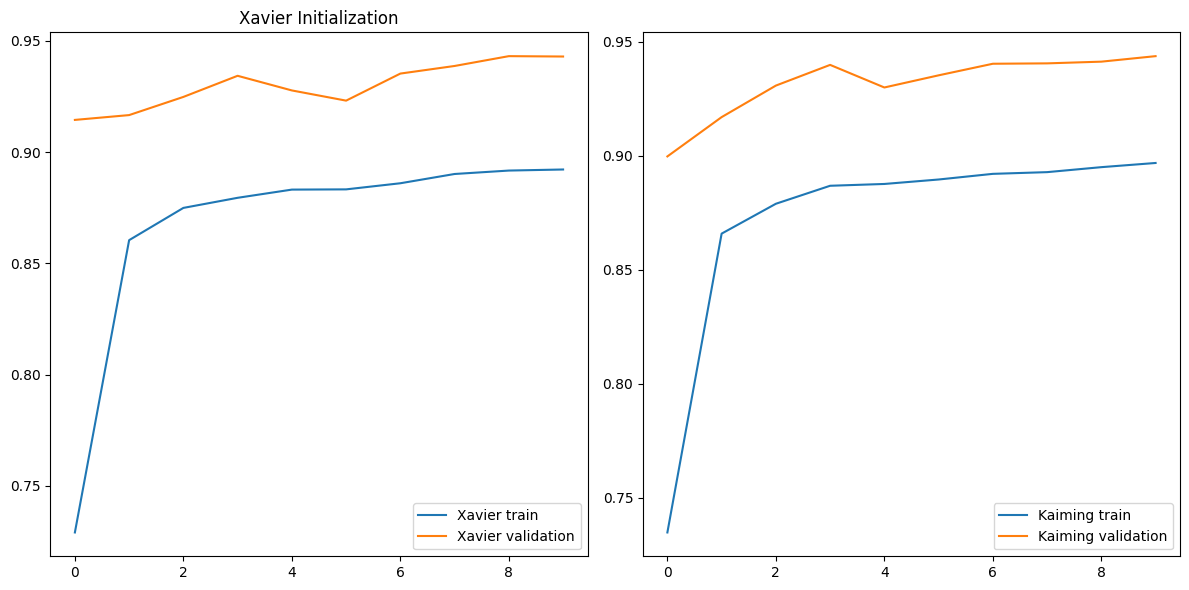

In [38]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.title("Xavier Initialization")
plt.plot(xavier_history.history['accuracy'],label = 'Xavier train')
plt.plot(xavier_history.history['val_accuracy'],label = 'Xavier validation')
plt.legend()

plt.subplot(1,2,2)
plt.plot(kaiming_history.history['accuracy'],label = 'Kaiming train')
plt.plot(kaiming_history.history['val_accuracy'],label = 'Kaiming validation')
plt.legend()

plt.tight_layout()
plt.show()